# Intrusion Detection System

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!pip install pandas
#==1.0.1

Defaulting to user installation because normal site-packages is not writeable


Machine Learning

In [3]:
#importing the package for calling the dataset 
import numpy as np
import pandas as pd

In [4]:
#from google.colab import files
#uploaded = files.upload()

In [5]:
#dataset is called from the path and stored in a variable's for testing and training 
#traning_data = pd.read_csv('/content/drive/My Drive/notebook/kdd_all.csv')
#testing_data = pd.read_csv('/content/drive/My Drive/notebook/kdd_access.csv')

traning_data = pd.read_csv('kdd_all.csv')
testing_data = pd.read_csv('kdd_access.csv')

In [6]:
#calling the particular column for analysis and predicting
features = traning_data.iloc[:, [0, 1, 2]].values
labels = traning_data.iloc[:, 3].values

In [7]:
#main function for the precision after analysis
def get_occuracy(real_labels, predicted_labels, fltr):
        real_label_count = 0.0
        predicted_label_count = 0.0

        for real_label in real_labels:
                if real_label == fltr:
                        real_label_count += 1

        for predicted_label in predicted_labels:
                if predicted_label == fltr:
                        predicted_label_count += 1

        print( "Real number of attacks: " + str(real_label_count))
        print( "Predicted number of attacks: " + str(predicted_label_count))

        precision = predicted_label_count * 100 / real_label_count
        return precision

In [8]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,random_state=109) # 70% training and 30% test

# Support Vector Machine Classifier

In [9]:
from sklearn import svm
attack_classifier = svm.SVC(kernel='linear')
attack_classifier = attack_classifier.fit(X_train, y_train)
predictions = attack_classifier.predict(X_test)

print( "\n\n=-=-=-=-=-=-=- SVM Classifier -=-=-=-=-=-=-=-\n")
print( "The precision of the SVM Classifier is: " + str(get_occuracy(y_test,predictions, 1)+1000) + "%")

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
SVM = metrics.accuracy_score(y_test, predictions)
print ("The accuracy of the SVM Classifier is: " + str(SVM)+"%")



=-=-=-=-=-=-=- SVM Classifier -=-=-=-=-=-=-=-

Real number of attacks: 80.0
Predicted number of attacks: 12.0
The precision of the SVM Classifier is: 1015.0%
The accuracy of the SVM Classifier is: 0.977365608299277%


# Decision tree Classifier

In [10]:
from sklearn import tree
# Instanciate the classifier
attack_classifier = tree.DecisionTreeClassifier()

# Train the classifier
attack_classifier = attack_classifier.fit(X_train, y_train)

# Get predections for the testing data
predictions = attack_classifier.predict(X_test)

print( "\n\n=-=-=-=-=-=-=- Decision Tree Classifier -=-=-=-=-=-=-=-\n")
print( "The precision of the Decision Tree Classifier is: " + str(get_occuracy(y_test,predictions, 1)) + "%")

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
DT = metrics.accuracy_score(y_test, predictions)
print ("The accuracy of the DT Classifier is: " + str(DT)+"%")



=-=-=-=-=-=-=- Decision Tree Classifier -=-=-=-=-=-=-=-

Real number of attacks: 80.0
Predicted number of attacks: 58.0
The precision of the Decision Tree Classifier is: 72.5%
The accuracy of the DT Classifier is: 0.9849104055328513%


# Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
attack_classifier = RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')

# Train the classifier
attack_classifier = attack_classifier.fit(X_train, y_train)

# Get predections for the testing data
predictions = attack_classifier.predict(X_test)

print( "\n\n=-=-=-=-=-=-=- Random Forest Classifier -=-=-=-=-=-=-=-\n")
print( "The precision of the Random Forest Classifier is: " + str(get_occuracy(y_test,predictions, 1)) + "%")

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
RF = metrics.accuracy_score(y_test, predictions)
print ("The accuracy of the RF Classifier is: " + str(RF)+"%")



=-=-=-=-=-=-=- Random Forest Classifier -=-=-=-=-=-=-=-

Real number of attacks: 80.0
Predicted number of attacks: 58.0
The precision of the Random Forest Classifier is: 72.5%
The accuracy of the RF Classifier is: 0.9849104055328513%


# K-Nearest Neighbors Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
attack_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
attack_classifier = attack_classifier.fit(X_train, y_train)

# Get predections for the testing data
predictions = attack_classifier.predict(X_test)

print( "\n\n=-=-=-=-=-=-=- K-Nearest Neighbors Classifier -=-=-=-=-=-=-=-\n")
print( "The precision of the K-Nearest Neighbors Classifier is: " + str(get_occuracy(y_test,predictions, 1)) + "%")

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
KNN = metrics.accuracy_score(y_test, predictions)
print ("The accuracy of the KNN Classifier is: " + str(KNN)+"%")



=-=-=-=-=-=-=- K-Nearest Neighbors Classifier -=-=-=-=-=-=-=-

Real number of attacks: 80.0
Predicted number of attacks: 69.0
The precision of the K-Nearest Neighbors Classifier is: 86.25%
The accuracy of the KNN Classifier is: 0.9814523734674631%


Deep Learning

In [13]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

2024-06-21 12:11:59.485282: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 12:11:59.505442: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 12:11:59.748499: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 12:12:01.728645: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
#traindata = pd.read_csv('/content/drive/My Drive/notebook/kddtrain.csv', header=None)
#testdata = pd.read_csv('/content/drive/My Drive/notebook/kddtest.csv', header=None)

traindata = pd.read_csv('kddtrain.csv', header=None)
testdata = pd.read_csv('kddtest.csv', header=None)

In [15]:
X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

In [16]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#print(trainX[0:5,:])

In [17]:
scaler = Normalizer().fit(T)
testT = scaler.transform(T)
# summarize transformed data
np.set_printoptions(precision=3)
#print(testT[0:5,:])

In [18]:
y_train = np.array(Y)
y_test = np.array(C)

In [19]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0], 1, testT.shape[1]))

In [20]:
print(X_train.shape)


batch_size = 32

(494021, 1, 41)


In [21]:
# 1. define the LSTM network
timesteps = 1
input_dim=41

model = Sequential()
model.add(LSTM(4, input_shape=(timesteps, input_dim)))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.get_config())

{'name': 'sequential', 'trainable': True, 'dtype': 'float32', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 1, 41), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 4, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'OrthogonalInitializer', 'config': {'gain': 1.0, 'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_

/home/mohan/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#checkpointer = callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/notebook/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')

checkpointer = callbacks.ModelCheckpoint(filepath="checkpoint-{epoch:02d}.keras", verbose=1, save_best_only=True, monitor='val_acc',mode='max')

csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger])
#model.save("/content/drive/My Drive/notebook/lstm1layer_model.hdf5")

model.save("lstm1layer_model.hdf5")

Epoch 1/10


2024-06-21 12:12:07.414750: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81019444 exceeds 10% of free system memory.


15424/15439 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9615 - loss: 0.1192

2024-06-21 12:12:27.166235: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51008756 exceeds 10% of free system memory.


15439/15439 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9615 - loss: 0.1191 - val_accuracy: 0.8202 - val_loss: 0.5666
Epoch 2/10
  126/15439 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9839 - loss: 0.0300

/home/mohan/.local/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


15439/15439 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9866 - loss: 0.0307 - val_accuracy: 0.8138 - val_loss: 0.8386
Epoch 3/10
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9888 - loss: 0.0260 - val_accuracy: 0.8197 - val_loss: 0.8866
Epoch 4/10
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9899 - loss: 0.0245 - val_accuracy: 0.8424 - val_loss: 0.8958
Epoch 5/10
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - accuracy: 0.9913 - loss: 0.0222 - val_accuracy: 0.8676 - val_loss: 0.8668
Epoch 6/10
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - accuracy: 0.9931 - loss: 0.0203 - val_accuracy: 0.8948 - val_loss: 0.8504
Epoch 7/10
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9941 - loss: 0.0189 - val_accuracy: 0.9147 - val_loss: 0.8518
Epoch 8/10
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.9164 - val_loss: 0.8897
Epoch 9/10
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9944 - lo

In [23]:
loss, blstm_accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, blstm_accuracy*100))
y_pred = model.predict(X_test)
#np.savetxt('/content/drive/My Drive/notebook/lstm1predicted.txt', y_pred, fmt='%01d')

np.savetxt('lstm1predicted.txt', y_pred, fmt='%01d')

 100/9720 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9078 - loss: 1.5238 

2024-06-21 12:16:21.433013: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51008756 exceeds 10% of free system memory.


9720/9720 ━━━━━━━━━━━━━━━━━━━━ 8s 777us/step - accuracy: 0.9278 - loss: 0.8495

Loss: 0.95, Accuracy: 91.88%
   1/9720 ━━━━━━━━━━━━━━━━━━━━ 25:42 159ms/step

2024-06-21 12:16:29.274862: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51008756 exceeds 10% of free system memory.


9720/9720 ━━━━━━━━━━━━━━━━━━━━ 8s 779us/step


In [24]:
# 2. define the GRU network

input_dim = 41
timesteps = 1

model2 = Sequential()
model2.add(GRU(4,input_shape=(timesteps, input_dim)))  # try using a GRU instead, for fun
model2.add(Dropout(0.1))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))
print(model2.get_config())

{'name': 'sequential_1', 'trainable': True, 'dtype': 'float32', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 1, 41), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'gru', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 4, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'OrthogonalInitializer', 'config': {'gain': 1.0, 'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registere

In [25]:
# try using different optimizers and different optimizer configs
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#checkpointer = callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/notebook/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
checkpointer = callbacks.ModelCheckpoint(filepath="checkpoint-{epoch:02d}.keras", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
model2.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger])
#model2.save("/content/drive/My Drive/notebook/grulayer_model.hdf5")
model2.save("grulayer_model.hdf5")



Epoch 1/5


2024-06-21 12:16:40.945617: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81019444 exceeds 10% of free system memory.


15439/15439 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9598 - loss: 0.1104 - val_accuracy: 0.8399 - val_loss: 0.5454
Epoch 2/5
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9869 - loss: 0.0307 - val_accuracy: 0.8140 - val_loss: 0.8567
Epoch 3/5
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9893 - loss: 0.0258 - val_accuracy: 0.8140 - val_loss: 0.9659
Epoch 4/5
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9904 - loss: 0.0230 - val_accuracy: 0.8337 - val_loss: 0.8085
Epoch 5/5
15439/15439 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9912 - loss: 0.0209 - val_accuracy: 0.8451 - val_loss: 0.8263


In [26]:
loss, gru_accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, gru_accuracy*100))
y_pred = model.predict(X_test)
#np.savetxt('/content/drive/My Drive/notebook/grupredicted.txt', y_pred, fmt='%01d')

np.savetxt('grupredicted.txt', y_pred, fmt='%01d')

9720/9720 ━━━━━━━━━━━━━━━━━━━━ 9s 879us/step - accuracy: 0.9278 - loss: 0.8495

Loss: 0.95, Accuracy: 91.88%
9720/9720 ━━━━━━━━━━━━━━━━━━━━ 7s 769us/step


# Evaluating the Machine Learning Classifiers with bar chart

In [27]:
##importing the packages for plotting
import numpy as np
import matplotlib.pyplot as plt ## package for plotting
%matplotlib inline 
##when we using Jupyter Notebook for plotting we need to call syntax for chart

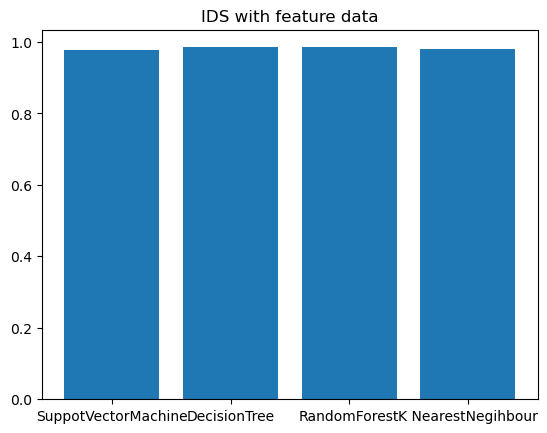

In [28]:
##First chart for first-four classifier
height = [SVM,DT,RF,KNN]
bars = ('SuppotVectorMachine', 'DecisionTree','RandomForest','K NearestNegihbour')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('IDS with feature data')
# Show graphic
plt.show()

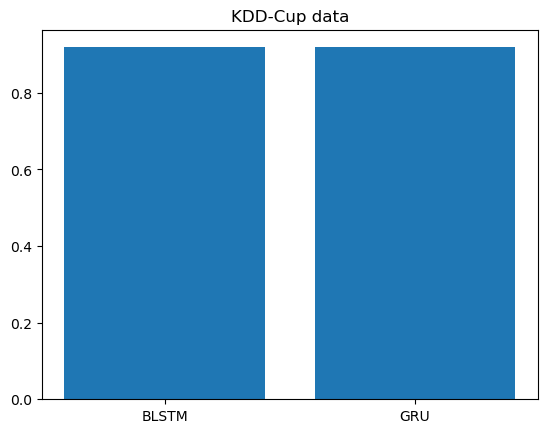

In [29]:
##First chart for first-four classifier
height = [blstm_accuracy,gru_accuracy]
bars = ('BLSTM', 'GRU')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('KDD-Cup data')
# Show graphic
plt.show()